# Image Filtering

* Apply custom-made filters to images (2D convolution)
* Box filter
* Various filters
* Sharpening filter
* Gaussian filter
* Thresholuding
* Sobel filter and Image Gradient

As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. 
LPF helps in removing noise, blurring images, etc. 
HPF filters help in finding edges in images.

## OpenCV
* How to install using conda
    * `conda install -c conda-forge py-opencv`

* Official Opencv doumentation
    * https://docs.opencv.org/4.4.0/index.html

As a first step, the OpenCV python library is imported.
The proper way to do this is to additionally assign it the name cv, which is used in the following to reference the library.

In [1]:
import os
import cv2 as cv # OpenCV
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [16, 9]

# %matplotlib qt
# %matplotlib inline

## Image Filters

OpenCV provides a function `cv.filter2D()` to convolve a kernel with an image. 

* Convolves an image with the kernel.
    * `dst = cv.filter2D( src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])`
    * The function does actually compute correlation, not the convolution. If you need a real convolution, flip the kernel.
    * ddepth: bit depth of outout, set ddepth to -1 to retain bit depth of input


As an example, we will try an averaging filter on an image. 
A 5x5 averaging filter kernel will look like the below:

$K = \frac{1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}$

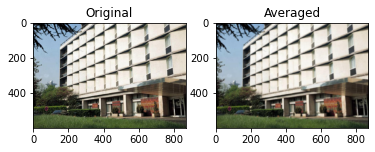

0.0


In [4]:
img = cv.imread('resource/building.jpg')

# make kernel
kernel = np.array([[1,1,1,1,1],
                  [1,1,1,1,1],
                  [1,1,1,1,1],
                  [1,1,1,1,1],
                  [1,1,1,1,1],],dtype=np.float64) / 25

# image filtering
# TODO 
filtered = cv.filter2D(img, ddepth=-1, kernel=kernel)
# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(filtered, cv.COLOR_BGR2RGB)),plt.title('Averaged')
plt.show()

# compare image with the test image
ref = cv.imread("resource/box5.png")
mse = np.mean((ref - filtered)**2)
print(mse)
assert mse < 5

## Box filter
* Averages pixels in a box shaped window.
* Sum of kernel should be 1


The operation works like this: keep this kernel above a pixel, add all the pixels below this kernel, take the average, and replace the central pixel with the new average value. This operation is continued for all the pixels in the image.

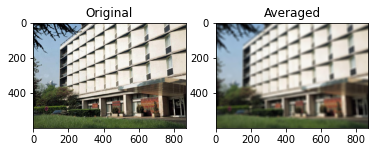

0.0


In [35]:
img = cv.imread('resource/building.jpg')

# ----------------------------------------------------------------------------
# TODO: 크기가 15인 박스필터 만들어 필터링하기

# make kernel
N = 15
kernel = np.ones((N, N), dtype=np.float64) / N**2

# image filtering
avg = cv.filter2D(img, -1, kernel)
# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(avg, cv.COLOR_BGR2RGB)),plt.title('Averaged')
plt.show()

# compare image with the test image
ref = cv.imread("resource/box15.png")
mse = np.mean((ref - avg)**2)
print(mse)
assert mse < 5

## Other filters

* 이미지가 변경되지 않는 필터 (unchanged)

$K =  \begin{bmatrix} 0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{bmatrix}$

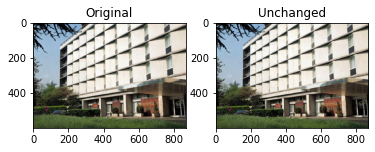

0.0


In [48]:
img = cv.imread('resource/building.jpg')

# ----------------------------------------------------------------------------
# TODO: 그대로 이미지가 나오는 필터링 (identity filter)

# make kernel
N = 5
mid = N//2
kernel = np.zeros((N,N), dtype=np.float64)
kernel[mid][mid] = 1

# image filtering
unchanged = cv.filter2D(img,-1,kernel) 
# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(unchanged, cv.COLOR_BGR2RGB)),plt.title('Unchanged')
plt.show()

# compare image with the test image
ref = img
mse = np.mean((ref - unchanged)**2)
print(mse)
assert mse < 5

* 이미지를 왼쪽으로 10 픽셀을 이동시키는 필터 (shift to left)
    * 커널의 중심으로 부터 10 픽셀 떨어진 위치에 1을 할당 (커널의 중심은 보통 커널의 중간 지점이다.)

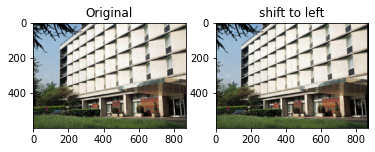

0.0


In [87]:
img = cv.imread('resource/building.jpg')

# ----------------------------------------------------------------------------
# TODO: 이미지를 왼쪽으로 10 픽셀을 이동시키는 필터 구현하기

# make kernel
N = 21
mid = N//2
kernel = np.zeros((N,N), dtype=np.float64)
kernel[mid][-1] = 1

# image filtering (
# 이미지 보더 부분은 0으로 채워지게 설정 (use borderType=cv.BORDER_CONSTANT)
shifted = cv.filter2D(img, -1, kernel, borderType=cv.BORDER_CONSTANT)

# ----------------------------------------------------------------------------
plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(shifted, cv.COLOR_BGR2RGB)),plt.title('shift to left')
plt.show()


# compare image with the test image
ref = cv.imread("resource/shifted10.png")
mse = np.mean((ref - shifted)**2)
print(mse)
assert mse < 5

## Sharpening filter

* 박스 필터를 이용하여 sharpening 필터를 만들 수 있다.

$K =  ?$

* 커널의 합이 1이여야 함


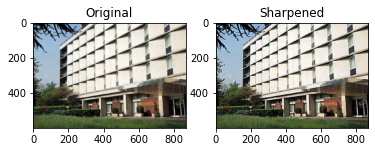

0.0


In [139]:
img = cv.imread('resource/building.jpg')

# ----------------------------------------------------------------------------
# TODO: sharpening filter 구현

# make kernel
N = 7  # 박스 필터의 크기는 7으로 할 것
mid = N//2
src = np.zeros((N, N), dtype=np.float64)
src[mid][mid] = 2
kernel = src - np.ones((N, N), dtype=np.float64) / N**2

# image filtering
sharpened = cv.filter2D(img,-1,kernel)
# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB)),plt.title('Sharpened')
plt.show()

# compare image with the test image
ref = cv.imread("resource/sharpened7.png")
mse = np.mean((ref - sharpened)**2)
print(mse)
assert mse < 5

## Gaussian filter

* Named (like many other things) after Carl Friedrich Gauss, most representative low-pass filter.

* Kernel values sampled from the 2D Gaussian function, weight falls off with distance from center pixel

$f(i,j)=\frac{1}{2\pi\sigma^2} e^{−\frac{i^2+j^2}{2\sigma^2}}$



* theoretically infinite, in practice truncated to some maximum distance


[[0.00492233 0.00919613 0.01338028 0.01516185 0.01338028 0.00919613
  0.00492233]
 [0.00919613 0.01718062 0.02499766 0.02832606 0.02499766 0.01718062
  0.00919613]
 [0.01338028 0.02499766 0.03637138 0.04121417 0.03637138 0.02499766
  0.01338028]
 [0.01516185 0.02832606 0.04121417 0.04670178 0.04121417 0.02832606
  0.01516185]
 [0.01338028 0.02499766 0.03637138 0.04121417 0.03637138 0.02499766
  0.01338028]
 [0.00919613 0.01718062 0.02499766 0.02832606 0.02499766 0.01718062
  0.00919613]
 [0.00492233 0.00919613 0.01338028 0.01516185 0.01338028 0.00919613
  0.00492233]]


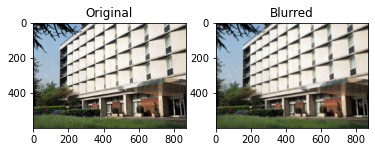

0.0


In [121]:
# ----------------------------------------------------------------------------
# TODO: gaussian filter를 구현
# cv.GaussianBlur 를 사용하지 마세요.


# make kernel
sigma = 2.0 # sigma는 2.0로 할것
N = 7 # 필터 크기를 7로 할것

# 커널의 x와 y 좌표에 대해 gaussian function을 구한다.
idx = np.arange(start=-(N//2),stop=N//2+1)
x_idx, y_idx = np.meshgrid(idx, idx)

kernel = 1 / (2*np.pi*(sigma**2)) * np.exp(-(x_idx**2 + y_idx**2) / (2 * (sigma**2)))

# 커널의 합(np.sum(kernel))이 1이 되야 함 (np.sum 을 사용)
kernel = kernel / np.sum(kernel)

print(kernel)

# image filtering
blurred = cv.filter2D(img,-1,kernel)
# ----------------------------------------------------------------------------
plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB)),plt.title('Blurred')
plt.show()


# compare image with the test image
ref = cv.imread("resource/gaussian.png")
mse = np.mean((ref - blurred)**2)
print(mse)
assert mse < 5


### Sobel filter and Image Gradient

* Sobel filter
    * Horizontal derivative
    
    $S_x = \ \begin{bmatrix} 1 & 0 & -1 \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{bmatrix}$
    
    * Vertical derivative 
    
    $S_y = \ \begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$
    
    * Amplitude
    
    $||\nabla{f}||=\sqrt{\left( \frac{\partial f}{\partial x} \right)^2+\left(\frac{\partial f}{\partial y} \right)^2}$

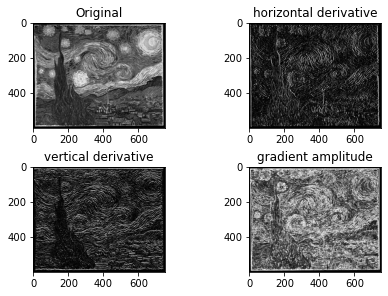

0.0
0.0
0.0


In [138]:
img = cv.imread('resource/starry_night.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY).astype(np.float64) / 255

# --------------------------------
# TODO: sobel filter and image gradient
# Sobel filter를 구현하여 image gradient 구하기
# horizontal derivative, vertical derivative, gradient amplitude를 구하기

# make kernel
fx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]], dtype=np.float64)
fy = np.array([[-1, -2, -1],
               [0, 0, 0],
               [1, 2, 1]], dtype=np.float64)

# image filtering
# compute horizontal derivative, vertical derivative 
dx = cv.filter2D(img, -1, fx)
dy = cv.filter2D(img, -1, fy)

# compute amplitude 
amp = np.sqrt(dx**2 + dy**2)

# --------------------------------
# convert data type 
dx = (255*np.clip(dx,0.0,1.0)).astype(np.uint8)
dy = (255*np.clip(dy,0.0,1.0)).astype(np.uint8)
amp = (255*np.clip(amp,0.0,1.0)).astype(np.uint8)

fig, axs = plt.subplots(2, 2, constrained_layout=True)
axs[0][0].imshow(img, cmap='gray'), axs[0][0].set_title('Original')
axs[0][1].imshow(dx, cmap='gray'), axs[0][1].set_title('horizontal derivative')
axs[1][0].imshow(dy, cmap='gray'), axs[1][0].set_title('vertical derivative')
axs[1][1].imshow(amp, cmap='gray'), axs[1][1].set_title('gradient amplitude')
plt.show()


# compare image with the test image
ref = cv.imread("resource/dx.png", cv.IMREAD_UNCHANGED)
mse = np.mean((ref - dx)**2)
print(mse)
assert mse < 5

ref = cv.imread("resource/dy.png", cv.IMREAD_UNCHANGED)
mse = np.mean((ref - dy)**2)
print(mse)
assert mse < 5

ref = cv.imread("resource/amp.png", cv.IMREAD_UNCHANGED)
mse = np.mean((ref - amp)**2)
print(mse)
assert mse < 5
